In [15]:
import numpy as np

def power_method(P, max_iter=1000, tol=1e-6):
    n = P.shape[0]
    v = np.ones(n) / n  # Initialize with equal probability distribution
    for _ in range(max_iter):
        v_next = P @ v  # Matrix-vector multiplication
        v_next /= np.linalg.norm(v_next, 1)  # Normalize vector
        if np.linalg.norm(v_next - v, 1) < tol:  # Check convergence
            break
        v = v_next
    return v


In [16]:
from scipy.sparse import csr_matrix

def page_rank(A, d=0.85, max_iter=1000, tol=1e-6):
    """Compute PageRank."""
    n = A.shape[0]

    # Normalize adjacency matrix
    row_sums = np.array(A.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1  # Avoid division by zero for dangling nodes
    P = A.multiply(1 / row_sums[:, np.newaxis])  # Sparse matrix normalization

    # Add damping factor using sparse matrix
    teleport = csr_matrix(np.ones((n, n)) * (1 - d) / n)
    P = d * P + teleport

    return power_method(P, max_iter, tol)


In [17]:
import scipy.sparse as sp

def create_adjacency_matrix(filename, n_nodes):
    edges = []
    with open(filename, 'r') as file:
        for line in file:
            src, dst = map(int, line.strip().split())
            edges.append((src, dst))
    
    rows, cols = zip(*edges)
    data = [1] * len(rows)
    A = sp.csr_matrix((data, (rows, cols)), shape=(n_nodes, n_nodes))
    return A


In [18]:
def find_max_node(filename):
    """Find the maximum node index in the .arcs file."""
    max_node = -1
    with open(filename, 'r') as file:
        for line in file:
            source, target = map(int, line.split())
            max_node = max(max_node, source, target)
    return max_node

max_node_index = find_max_node("enron.arcs")
print(f"Maximum node index: {max_node_index}")


Maximum node index: 36358


In [19]:
n_nodes = max_node_index + 1
adjacency_matrix = create_adjacency_matrix("enron.arcs", n_nodes=n_nodes)

ranks = page_rank(adjacency_matrix)


In [20]:
top_10_indices = np.argsort(-ranks)[:10]
print("Top 10 PageRanks and their indices:")
for i in top_10_indices:
    print(f"Node {i}: {ranks[i]}")


Top 10 PageRanks and their indices:
Node 10: 0.00018332813903577466
Node 0: 2.7499220855409108e-05
Node 24236: 2.7499220855409108e-05
Node 24237: 2.7499220855409108e-05
Node 24238: 2.7499220855409108e-05
Node 24239: 2.7499220855409108e-05
Node 24240: 2.7499220855409108e-05
Node 24235: 2.7499220855409108e-05
Node 24241: 2.7499220855409108e-05
Node 24243: 2.7499220855409108e-05


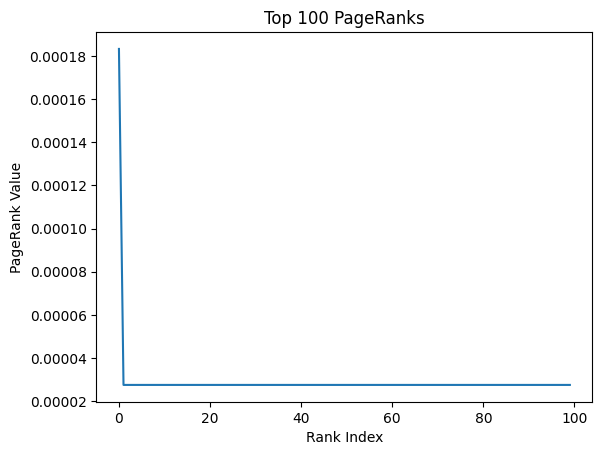

In [21]:
import matplotlib.pyplot as plt

plt.plot(sorted(ranks, reverse=True)[:100])
plt.title("Top 100 PageRanks")
plt.xlabel("Rank Index")
plt.ylabel("PageRank Value")
plt.show()
